# Implementation of Kernel Dictionary learning

Import area :

In [1]:
import Signal as sg
import Kernel as kn
import KernelDictionaryLearning as kdl
import numpy as np
import matplotlib.pyplot as plt

Instancing all objects : 

In [2]:
polynomial_kernel = kn.polynomial_kernel(c=0,d=2)
signals_r1 = sg.synthetic_circle(radius=1,data_number=1500)
signals_r2 = sg.synthetic_circle(radius=2,data_number=1500)
trained_kdl_r1 = kdl.KernelDictionaryLearning(signals=signals_r1,kernel=polynomial_kernel,sparsity_level=3,atom_number=30,n_iter=10)
trained_kdl_r1.learn()
trained_kdl_r2 = kdl.KernelDictionaryLearning(signals=signals_r2,kernel=polynomial_kernel,sparsity_level=3,atom_number=30,n_iter=10)
test = trained_kdl_r2.learn()

Total representation error is -2.1275667894856906e-13 at step 0, vp max de (I-AX) = 1.0000000000000036
Total representation error is -2.2167475823040072e-13 at step 1, vp max de (I-AX) = 1.0000000000000024
Total representation error is -2.157798538814104e-13 at step 2, vp max de (I-AX) = 1.0000000000000024
Total representation error is -2.090283750920711e-13 at step 3, vp max de (I-AX) = 1.0000000000000027
Total representation error is -2.16291605705124e-13 at step 4, vp max de (I-AX) = 1.0000000000000024
Total representation error is -2.178361954523659e-13 at step 5, vp max de (I-AX) = 1.0000000000000027
Total representation error is -2.2198732341592223e-13 at step 6, vp max de (I-AX) = 1.0000000000000024
Total representation error is -2.21789326845803e-13 at step 7, vp max de (I-AX) = 1.0000000000000033
Total representation error is -2.234297818970783e-13 at step 8, vp max de (I-AX) = 1.0000000000000029
Total representation error is -2.2212231818318652e-13 at step 9, vp max de (I-AX)

In [3]:
print(test)

successfull


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


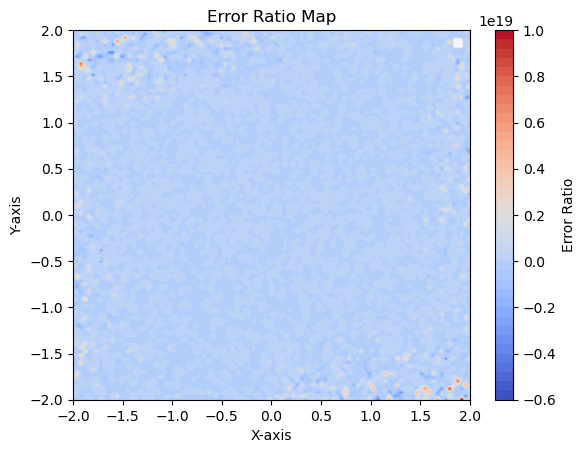

In [6]:
resolution_plot = 100
coord_lim = 2
x = np.linspace(-coord_lim, coord_lim, resolution_plot)
y = np.linspace(-coord_lim, coord_lim, resolution_plot)

epsilon = 1e-32
Z = np.array([ np.array([ trained_kdl_r1.KOMP(sg.Signal([xi,yi],2))[1]/(trained_kdl_r2.KOMP(sg.Signal([xi,yi],2))[1]+epsilon) for xi in x]) for yi in y ])

plt.contourf(x,y, Z, levels=50, cmap="coolwarm")
plt.colorbar(label="Error Ratio")
plt.title("Error Ratio Map")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.legend()
plt.show()